In [1]:
import gensim
import gensim.downloader as gdl
glove = gdl.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# this functions computes and displays the 2-d t-SNE maps for a subset of the embedding vectors
# and displays them together with the points for a set of input words.

def display_tsne_neighborhood(model, input_word, nsample=1000, size1=2, size2=10, offset=5):
    
    arr = np.empty((0,100), dtype='f')
    word_label = input_word

    # add the vector for each of the closest words to the array
    for w in range(len(input_word)):
        arr = np.append(arr, np.array([model[input_word[w]]]), axis=0)

    voc = [w for w in model.vocab]
    wrds = np.random.choice(range(len(voc)), size=nsample, replace=False)
    for w in wrds:
        wrd_vector = model[voc[w]]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coord = Y[:, 0]
    y_coord = Y[:, 1]
    # display scatter plot
    size=2
    plt.scatter(x_coord, y_coord, s=size1)
    plt.scatter(x_coord[0:len(input_word)], y_coord[0:len(input_word)],s=size2)
    
    # label the input words
    for w in range(len(input_word)):
        plt.annotate(input_word[w], xy=(x_coord[w],y_coord[w]), \
                     xytext=(w*offset,w*offset), textcoords='offset points')
    plt.show()
    


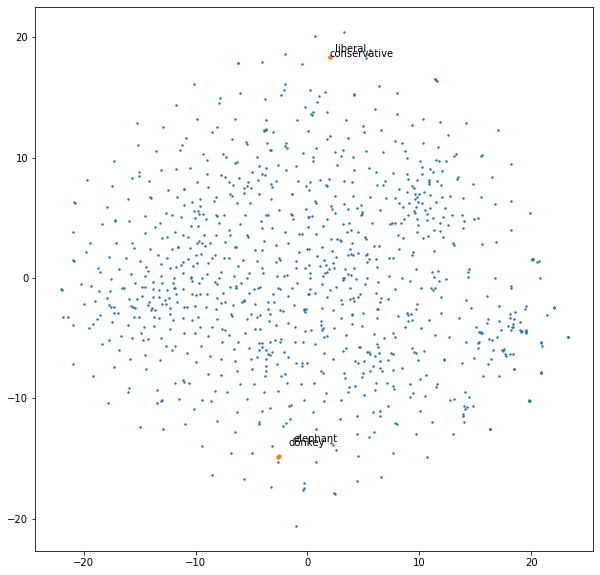

In [8]:
%matplotlib inline
plt.figure(figsize=(10,10))
display_tsne_neighborhood(glove, input_word = ['conservative', 'liberal', 'donkey', 'elephant'])
